# 2015-2018 MLB Pitch Analysis
## Thomas Lingren
## 12/5/23
## DSC 105

## Introduction 
Out of every sport in the world, one of the hardest things for a batter to do is hit a baseball. For one the average fastball in the Major Leagues is above 90 mph. From 60 ft 6 in. away the batter has about 150 milliseconds to decide whether or not to swing. With the ball in the hitting zone for less than 10 milliseconds. Hitting is so unique that failing 7 out of 10 times(30% success) is considered exceptionally good. Now just think about that pitchers don’t throw the same pitch every time. Gripping the ball differently along with different arm/wrist action results in a wide variety of crazy movements. They can throw a fastball which is the straightest and fastest pitch. They can throw a curveball which is slower and can curve anywhere from 40 to 70 inches causing the batter to swing too early and over the top of the ball. Also, a change-up can be thrown which looks like a fastball but only to drop at the last second. This is only the beginning, there are dozens of pitches that can be thrown. Now, imagine if you could predict what the pitcher was going to throw. That is what my project is going to attempt to find a pattern on and predict the probability of what pitch is going to come in a live at bat. 

## Reason 
This problem is interesting to me because I have grown up playing baseball my whole life so I have grown to love the sport. Also, this is one of, if not the biggest part of a baseball game is pitching and trying to get the opponent out.

## Constraints 
- There are many different types of hitters so every hitter will have a different pitch sequence. 
- There are a lot of different factors that have to be considered including the score of the game, runners on base, and number of outs.
- For me, I have to come up with a way to make a simulation of a live at-bat which I will need to learn.
- It may be hard to find/make the testing data to compare my model to.


## Goals
- Predict the probability of a pitcher to throw a certain pitch in every count(0-0, 0-1, 0-2, 1-0, 1-1, 1-2, 2-0, 2-1, 2-2, 3-0, 3-1- 3-2). The first number is the number of balls and the second is the number of strikes. (4 balls equals a walk which the batter gets to go to first, and 3-strikes result in the batter being out)
- Be able to use my model for a live game and predict the pitch that is about to be thrown.


## Non-goals
- Predict anything with the success of the batter.


## Metrics
If my model can predict what pitch is going to be thrown with anything above or near 60% accuracy that will be a win in my books. Because that would mean the hitter would know what will most likely be thrown based on past data.

## Abstract 
This project dives into the world of Major League Baseball(MLB) by using the power of data science, literate programming, and the R programming language. The power of the DataCamp workspaces is used for the programming of this project. The primary goal is to analyze pitches thrown in the 2019 season and to visualize the overall data and situational pitch types that were thrown. The process used to do this begins by processing the 2019 MLB pitch data from a reliable source and laying the foundation for data visualization. The main emphasis is on finding patterns, trends, and correlations within the data. Allowing for a better understanding of pitcher tendencies, batter vulnerabilities, and in-game pitch-by-pitch scenarios. The programming language R allows for user-friendly coding by using generic functions like ‘plot’. The plot function in this scenario is used to make a bar plot showing the number of times each pitch type was thrown. The user-friendliness and reproducibility of R also allow other users to easily read the code and replicate similar results to further the exploration of MLB pitch analysis. The dataset used for this analysis is 728790 observations of 40 variables. The main variables used will be ‘pitch_type’, ‘b_count’, and ‘s_count’. Looking at the whole dataset it can be seen as expected that the four-seam fastball was thrown the most. Followed by the Slider, then the change-up, etc. Then the observation of the pitch type in each ball and strike count will be observed in separate graphs. For future work, it would be interesting to dive into machine-learning models and be able to see if effective predictions could be made of certain scenarios. 

**Keywords:** Major League Baseball, data science, literate programming, R,  DataCamp, pitch type, plot function, observations, variables, machine learning.


![baseball_grips](baseball_grips.jpg)


![baseball_pitches_tracer](baseball_pitches_tracer.jpg)


## Pitch Type Glossary

CH - Changeup

CU - Curveball

EP - Eephus*

FC - Cutter

FF - Four-seam Fastball

FO - Pitchout (also PO)*

FS - Splitter

FT - Two-seam Fastball

IN - Intentional ball

KC - Knuckle curve

KN - Knuckeball

PO - Pitchout (also FO)*

SC - Screwball*

SI - Sinker

SL - Slider

UN - Unknown* - these pitch types occur rarely

First read the CSV file in using the `read.csv` function and save that into a dataframe named `pitches_df`. Then look at the structure of it.

In [2]:
#pitches_df <- read.csv("2019_pitches.csv")
pitches_df <- read.csv("2015-2018_pitches.csv")
str(pitches_df)

'data.frame':	2867154 obs. of  40 variables:
 $ px             : num  0.416 -0.191 -0.518 -0.641 -1.821 ...
 $ pz             : num  2.96 2.35 3.28 1.22 2.08 ...
 $ start_speed    : num  92.9 92.8 94.1 91 75.4 92.9 93.3 89.3 92.1 89.3 ...
 $ end_speed      : num  84.1 84.1 85.2 84 69.6 84.8 85.3 82.4 85 82 ...
 $ spin_rate      : num  2305 2690 2648 1290 1375 ...
 $ spin_dir       : num  159 151 145 170 281 ...
 $ break_angle    : num  -25 -40.7 -43.7 -1.3 18.4 -45.7 -46.3 7.3 -45 2 ...
 $ break_length   : num  3.2 3.4 3.7 5 12 3.7 3.6 4.8 4 4.9 ...
 $ break_y        : num  23.7 23.7 23.7 23.8 23.8 23.7 23.7 23.8 23.8 23.8 ...
 $ ax             : num  7.67 12.04 14.37 2.1 -10.28 ...
 $ ay             : num  34.7 34.2 35.3 28.4 21.8 ...
 $ az             : num  -12 -10.1 -11.6 -20.5 -34.1 ...
 $ sz_bot         : num  1.72 1.72 1.72 1.74 1.72 1.72 1.59 1.59 1.89 1.81 ...
 $ sz_top         : num  3.56 3.56 3.56 3.35 3.56 3.56 3.45 3.45 3.46 3.52 ...
 $ type_confidence: num  2 2 2 2 2 2 2 

Look at the first 6 lines of `pitches_df`.

In [3]:
head(pitches_df)

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,⋯,event_num,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.416,2.963,92.9,84.1,2305.052,159.235,-25.0,3.2,23.7,7.665,⋯,3,0,2.015e+09,0,0,0,1,0,0,0
2,-0.191,2.347,92.8,84.1,2689.935,151.402,-40.7,3.4,23.7,12.043,⋯,4,0,2.015e+09,0,1,0,2,0,0,0
3,-0.518,3.284,94.1,85.2,2647.972,145.125,-43.7,3.7,23.7,14.368,⋯,5,0,2.015e+09,0,2,0,3,0,0,0
4,-0.641,1.221,91.0,84.0,1289.590,169.751,-1.3,5.0,23.8,2.104,⋯,6,0,2.015e+09,0,2,0,4,0,0,0
5,-1.821,2.083,75.4,69.6,1374.569,280.671,18.4,12.0,23.8,-10.280,⋯,7,0,2.015e+09,1,2,0,5,0,0,0
6,0.627,2.397,92.9,84.8,2743.856,148.110,-45.7,3.7,23.7,13.590,⋯,8,0,2.015e+09,2,2,0,6,0,0,0


Look at the count and percentage of every pitch thrown(2015-2018).

In [4]:
# Count the frequency of each pitch using the table function
pitches_table <- table(pitches_df$pitch_type)
# This code just grabs all the pitches and leaves out the blank string count
pitches_freq <- pitches_table[2:(length(pitches_table))]
# Use the count table to create a percentage table
pitches_freq_perc <- (pitches_freq / sum(pitches_freq)) * 100
pitches_freq
# Round the percentages to 2 decimal places
round(pitches_freq_perc, digits = 2)


     AB      CH      CU      EP      FA      FC      FF      FO      FS      FT 
      9  292789  234391     815       9  149756 1014877     810   43705  337983 
     IN      KC      KN      PO      SC      SI      SL      UN 
   6197   66484   11260     628     113  242504  450578      57 


   AB    CH    CU    EP    FA    FC    FF    FO    FS    FT    IN    KC    KN 
 0.00 10.26  8.22  0.03  0.00  5.25 35.57  0.03  1.53 11.85  0.22  2.33  0.39 
   PO    SC    SI    SL    UN 
 0.02  0.00  8.50 15.79  0.00 

Plot the counts of each pitch type in a barplot and label the top of the bars with their corresponding percentages.

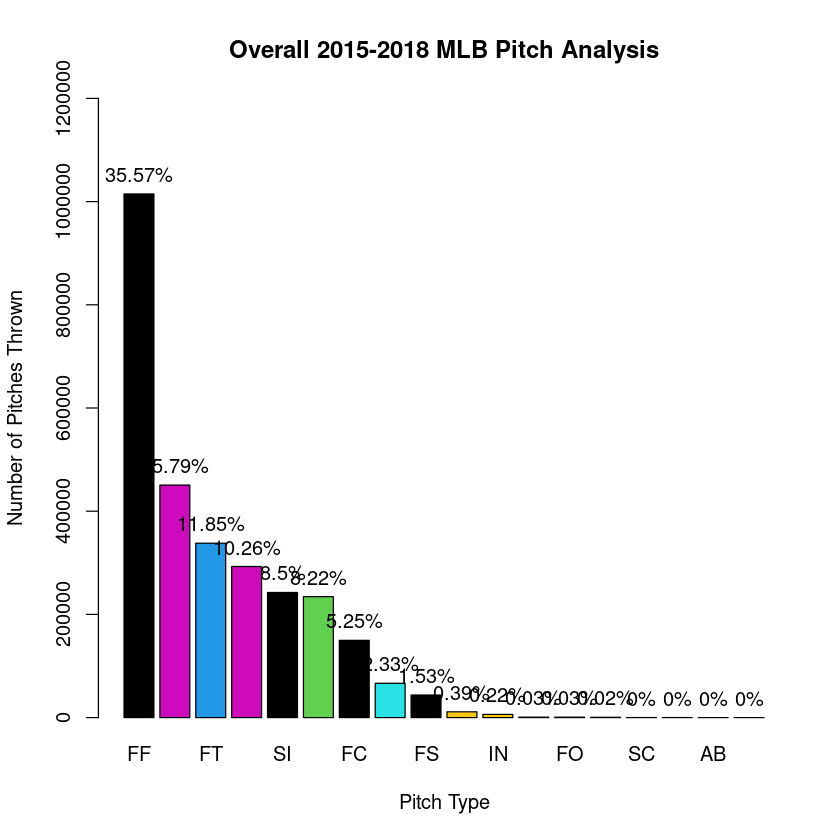

In [43]:
# The barplot function is used to create a barplot and store it in an object name `bp`.
# `main` is used to add a title to the plot
# `xlab` is used to add a x label
# `ylab` is used to add a y label
# `col` is used to set the colors of the bars.
# `ylim` is used to set the limits of the y axis.
# Sort the pitches_freq from biggest to smallest, AS well as the pitches_freq_perc
pitches_freq_sorted <- sort(pitches_freq, decreasing = TRUE)
pitches_freq_perc_sorted <- sort(pitches_freq_perc, decreasing = TRUE)
bp <- barplot(pitches_freq_sorted,
	   main = "Overall 2015-2018 MLB Pitch Analysis",
	   xlab = "Pitch Type",
	   ylab = "Number of Pitches Thrown",
	   col = factor(pitches_freq),
	   ylim = c(0, 1200000))
# The text function is used to add the percentages of the top of the bars.
# The first arguement is the x component for all of the labels which is just every bar (bp).
# The second arguement is the y component which is the height of every bar.
# The third arguement is the label that you want to add. The paste0 function is used to 
# concatenate the number percentage with the character '%'.
text(bp, round(pitches_freq_sorted, digits = 2), paste0(as.character(round(pitches_freq_perc_sorted, digits = 2)), '%'), pos = 3)

Looking at the barplot above we see many pitch types that are very rare. So let's look at the 7 most common. 

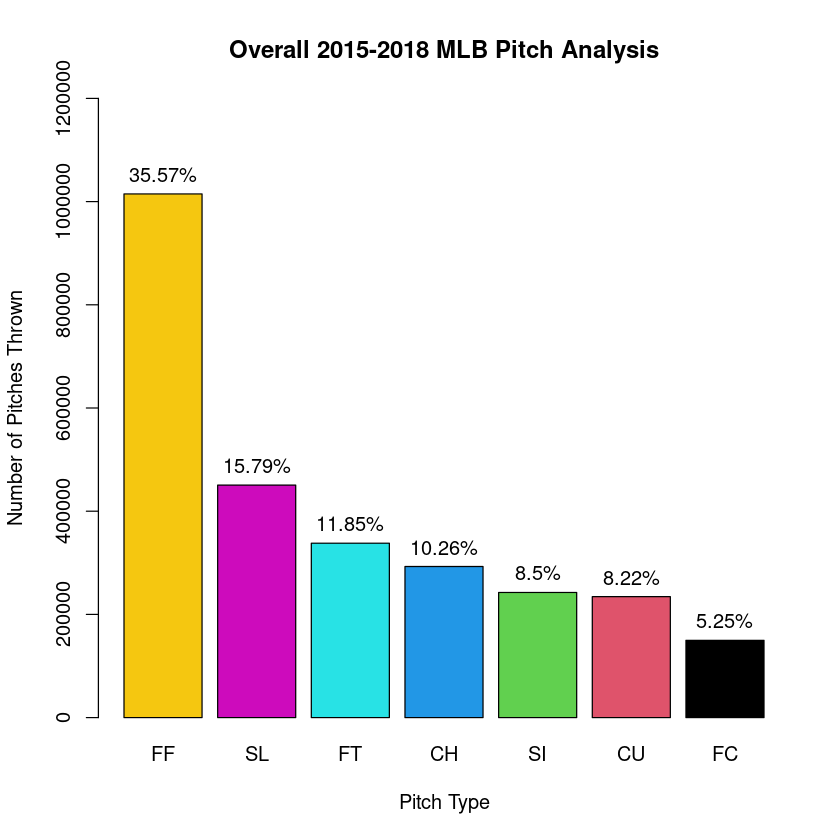

In [47]:
# A vector of the 7 most common pitch types. 
common_p <- c("CH", "CU", "FC", "FF", "FT", "SI", "SL")
# Build sorted array
common_pitches_sorted <- sort(pitches_freq[common_p], decreasing = TRUE)
# Build sorted percentages array
common_pitches_perc_sorted <- sort(pitches_freq_perc[common_p], decreasing = TRUE)
# Adapt the plot for the 7 most common pitch types.
bp <- barplot(common_pitches_sorted,
	   main = "Overall 2015-2018 MLB Pitch Analysis",
	   xlab = "Pitch Type",
	   ylab = "Number of Pitches Thrown",
	   col = factor(common_pitches_sorted),
	   ylim = c(0, 1200000))
text(bp, round(common_pitches_sorted, digits = 2), paste0(as.character(round(common_pitches_perc_sorted, digits = 2)), '%'), pos = 3)

## Pitch Type by Count Analysis

Look at the pitch type count, percentage, and barplot for a 0-0 count.

In [7]:
pitches <- pitches_df$pitch_type
strike = pitches_df$s_count
ball = pitches_df$b_count
count_0_0 <- table(pitches[ball == 0 & strike == 0])
count_0_0_freq <- count_0_0[2:(length(count_0_0))]
count_0_0_perc <- (count_0_0_freq / sum(count_0_0_freq)) * 100
count_0_0_freq
round(count_0_0_perc, digits = 2)


    AB     CH     CU     EP     FA     FC     FF     FO     FS     FT     IN 
     4  53168  66580    119      2  35995 278661     85   6837  98514   1331 
    KC     KN     PO     SC     SI     SL     UN 
 17833   3103    265     22  71809 102347     38 


   AB    CH    CU    EP    FA    FC    FF    FO    FS    FT    IN    KC    KN 
 0.00  7.22  9.04  0.02  0.00  4.89 37.82  0.01  0.93 13.37  0.18  2.42  0.42 
   PO    SC    SI    SL    UN 
 0.04  0.00  9.75 13.89  0.01 

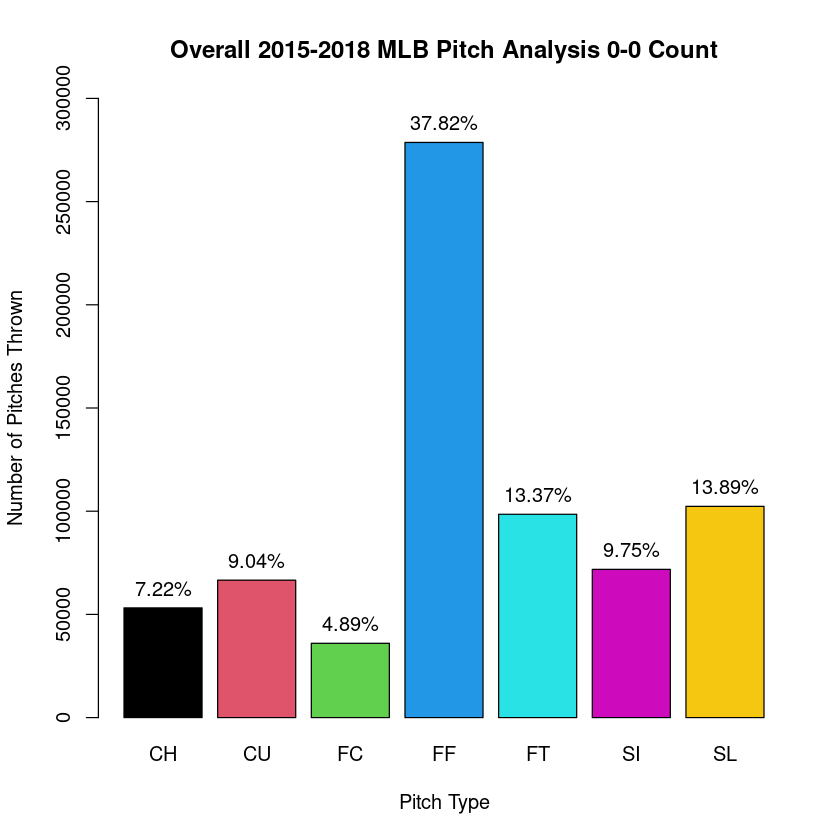

In [8]:
bp <- barplot(count_0_0_freq[common_p],
	   main = "Overall 2015-2018 MLB Pitch Analysis 0-0 Count",
	   xlab = "Pitch Type",
	   ylab = "Number of Pitches Thrown",
	   col = factor(common_p),
	   ylim = c(0, 300000))
text(bp, round(count_0_0_freq[common_p], digits = 2), paste0(as.character(round(count_0_0_perc[common_p], digits = 2)), '%'), pos = 3)

Look at the pitch type count, percentage, and barplot for a 1-0 count.

In [9]:
pitches <- pitches_df$pitch_type
strike = pitches_df$s_count
ball = pitches_df$b_count
count_1_0 <- table(pitches[ball == 1 & strike == 0])
count_1_0_freq <- count_1_0[2:(length(count_1_0))]
count_1_0_perc <- (count_1_0_freq / sum(count_1_0_freq)) * 100
count_1_0_freq
round(count_1_0_perc, digits = 2)


    CH     CU     EP     FC     FF     FO     FS     FT     IN     KC     KN 
 36898  15036     17  16217 103510     58   3967  39752   1423   4684   1198 
    PO     SC     SI     SL     UN 
    20     10  28145  38369      6 


   CH    CU    EP    FC    FF    FO    FS    FT    IN    KC    KN    PO    SC 
12.75  5.20  0.01  5.61 35.78  0.02  1.37 13.74  0.49  1.62  0.41  0.01  0.00 
   SI    SL    UN 
 9.73 13.26  0.00 

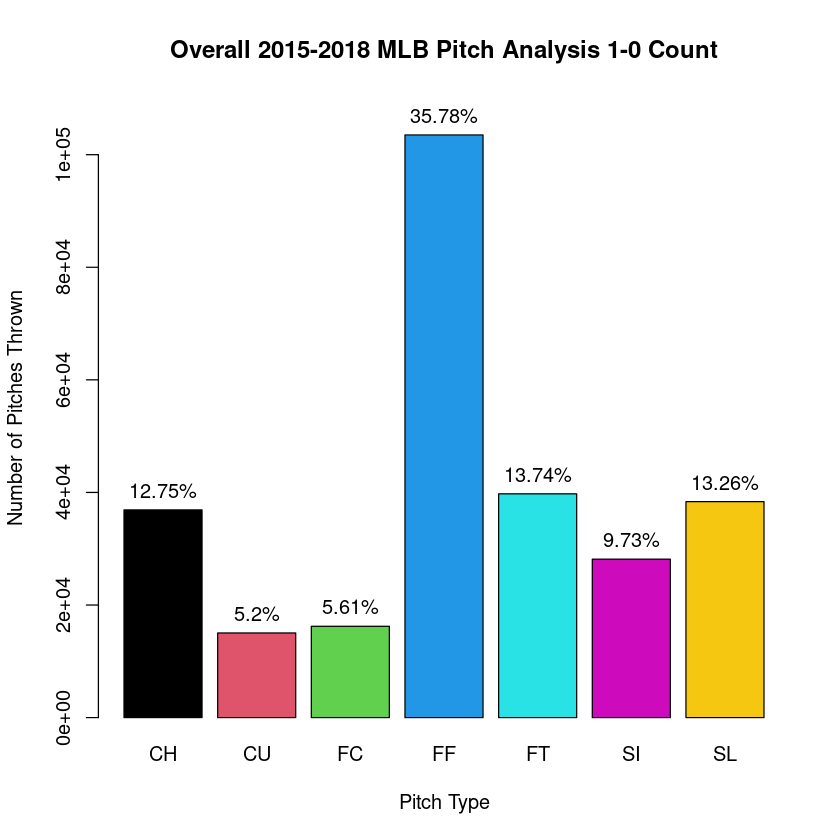

In [10]:
bp <- barplot(count_1_0_freq[common_p],
	   main = "Overall 2015-2018 MLB Pitch Analysis 1-0 Count",
	   xlab = "Pitch Type",
	   ylab = "Number of Pitches Thrown",
	   col = factor(common_p),
	   ylim = c(0, 110000))
text(bp, round(count_1_0_freq[common_p], digits = 2), paste0(as.character(round(count_1_0_perc[common_p], digits = 2)), '%'), pos = 3)

Look at the pitch type count, percentage, and barplot for a 2-0 count.

In [11]:
pitches <- pitches_df$pitch_type
strike = pitches_df$s_count
ball = pitches_df$b_count
count_2_0 <- table(pitches[ball == 2 & strike == 0])
count_2_0_freq <- count_2_0[2:(length(count_2_0))]
count_2_0_perc <- (count_2_0_freq / sum(count_2_0_freq)) * 100
count_2_0_freq
round(count_2_0_perc, digits = 2)


   CH    CU    EP    FC    FF    FO    FS    FT    IN    KC    KN    SC    SI 
 8661  1880     2  5209 43593     8   948 16664  1582   757   349     3 11457 
   SL    UN 
 8375     4 


   CH    CU    EP    FC    FF    FO    FS    FT    IN    KC    KN    SC    SI 
 8.71  1.89  0.00  5.24 43.82  0.01  0.95 16.75  1.59  0.76  0.35  0.00 11.52 
   SL    UN 
 8.42  0.00 

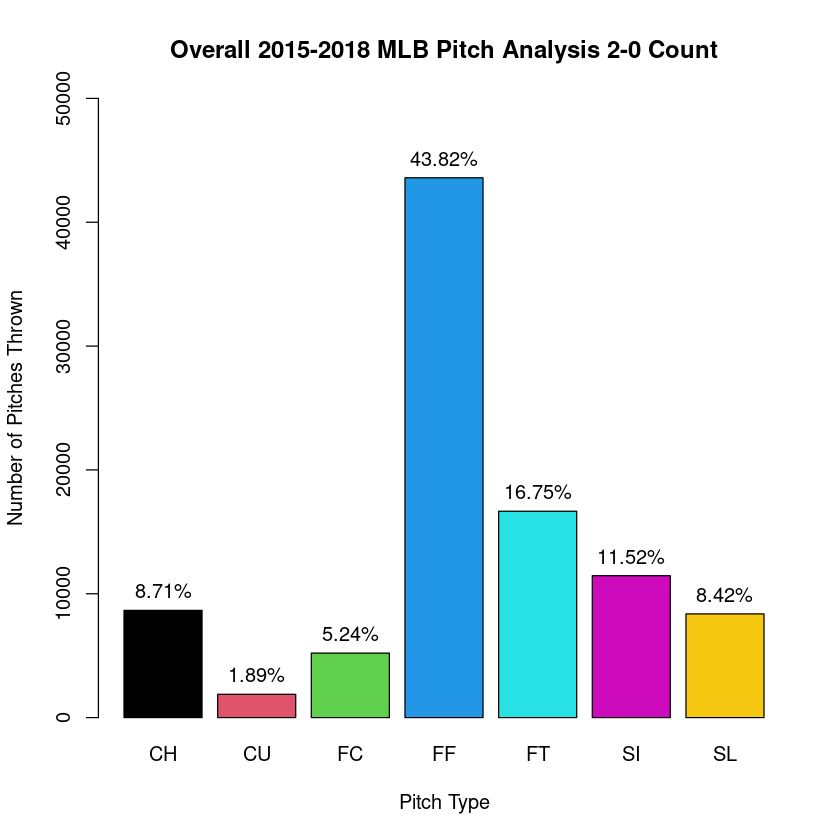

In [12]:
bp <- barplot(count_2_0_freq[common_p],
	   main = "Overall 2015-2018 MLB Pitch Analysis 2-0 Count",
	   xlab = "Pitch Type",
	   ylab = "Number of Pitches Thrown",
	   col = factor(common_p),
	   ylim = c(0, 50000))
text(bp, round(count_2_0_freq[common_p], digits = 2), paste0(as.character(round(count_2_0_perc[common_p], digits = 2)), '%'), pos = 3)

Look at the pitch type count, percentage, and barplot for a 3-0 count.

In [13]:
pitches <- pitches_df$pitch_type
strike = pitches_df$s_count
ball = pitches_df$b_count
count_3_0 <- table(pitches[ball == 3 & strike == 0])
count_3_0_freq <- count_3_0[2:(length(count_3_0))]
count_3_0_perc <- (count_3_0_freq / sum(count_3_0_freq)) * 100
count_3_0_freq
round(count_3_0_perc, digits = 2)


   CH    CU    FC    FF    FS    FT    IN    KC    KN    SI    SL    UN 
  510   127   865 19010    92  4936  1671    20    61  3834   502     3 


   CH    CU    FC    FF    FS    FT    IN    KC    KN    SI    SL    UN 
 1.61  0.40  2.73 60.10  0.29 15.60  5.28  0.06  0.19 12.12  1.59  0.01 

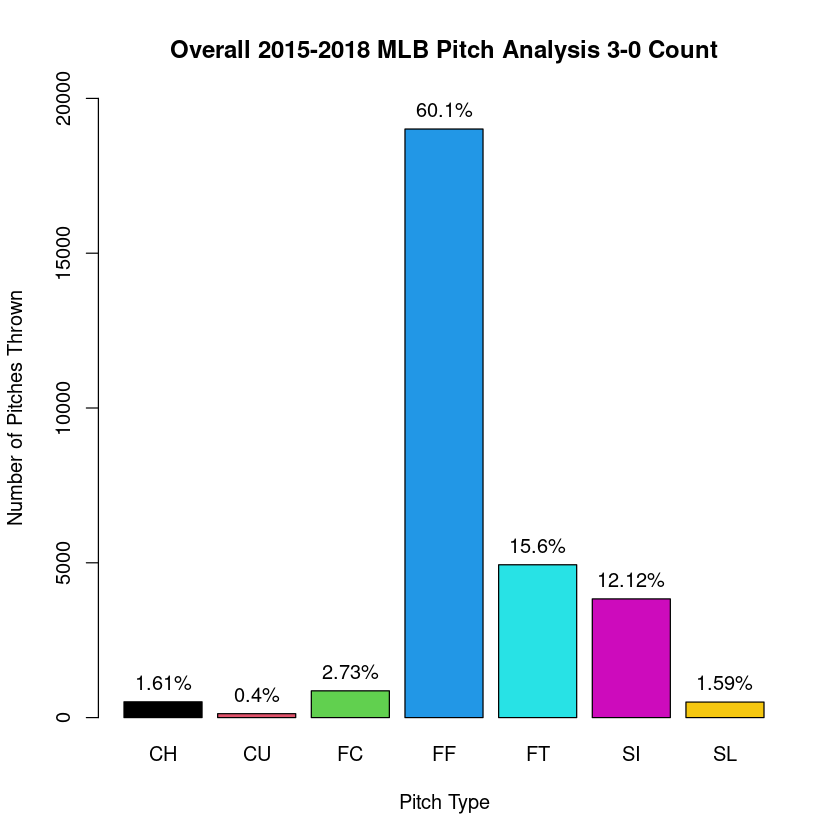

In [14]:
bp <- barplot(count_3_0_freq[common_p],
	   main = "Overall 2015-2018 MLB Pitch Analysis 3-0 Count",
	   xlab = "Pitch Type",
	   ylab = "Number of Pitches Thrown",
	   col = factor(common_p),
	   ylim = c(0, 20000))
text(bp, round(count_3_0_freq[common_p], digits = 2), paste0(as.character(round(count_3_0_perc[common_p], digits = 2)), '%'), pos = 3)

Look at the pitch type count, percentage, and barplot for a 0-1 count.

In [15]:
pitches <- pitches_df$pitch_type
strike = pitches_df$s_count
ball = pitches_df$b_count
count_0_1 <- table(pitches[ball == 0 & strike == 1])
count_0_1_freq <- count_0_1[2:(length(count_0_1))]
count_0_1_perc <- (count_0_1_freq / sum(count_0_1_freq)) * 100
count_0_1_freq
round(count_0_1_perc, digits = 2)


    CH     CU     EP     FA     FC     FF     FO     FS     FT     IN     KC 
 43106  35489    176      2  20917 115520    123   6172  40946     10  10050 
    KN     PO     SC     SI     SL     UN 
  1603    134     18  28342  63366      1 


   CH    CU    EP    FA    FC    FF    FO    FS    FT    IN    KC    KN    PO 
11.78  9.70  0.05  0.00  5.72 31.56  0.03  1.69 11.19  0.00  2.75  0.44  0.04 
   SC    SI    SL    UN 
 0.00  7.74 17.31  0.00 

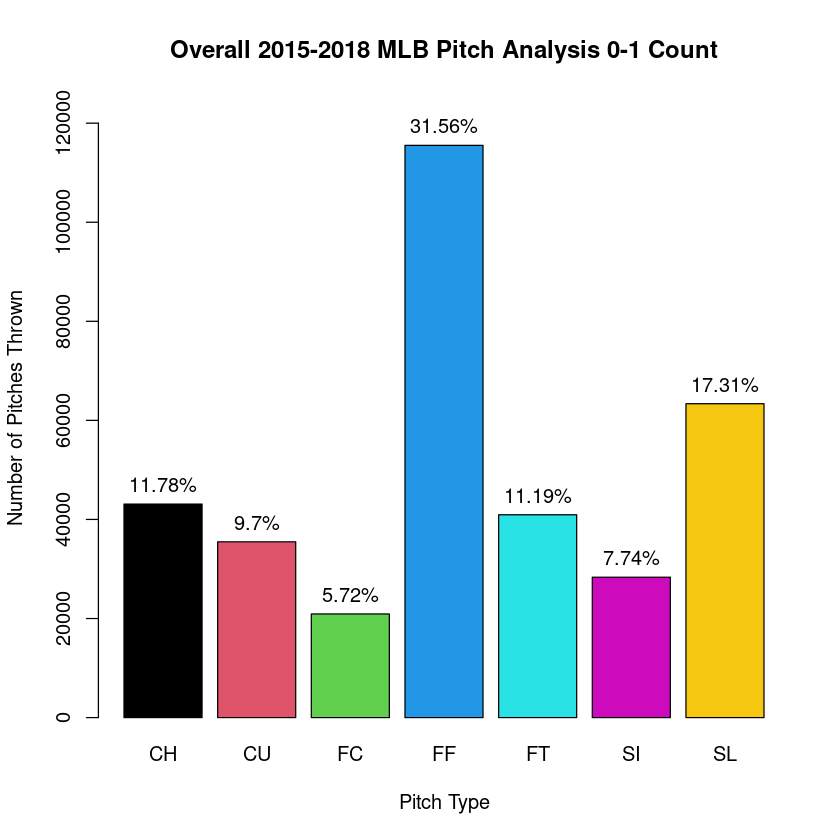

In [16]:
bp <- barplot(count_0_1_freq[common_p],
	   main = "Overall 2015-2018 MLB Pitch Analysis 0-1 Count",
	   xlab = "Pitch Type",
	   ylab = "Number of Pitches Thrown",
	   col = factor(common_p),
	   ylim = c(0, 125000))
text(bp, round(count_0_1_freq[common_p], digits = 2), paste0(as.character(round(count_0_1_perc[common_p], digits = 2)), '%'), pos = 3)

Look at the pitch type count, percentage, and barplot for a 0-2 count.

In [17]:
pitches <- pitches_df$pitch_type
strike = pitches_df$s_count
ball = pitches_df$b_count
count_0_2 <- table(pitches[ball == 0 & strike == 2])
count_0_2_freq <- count_0_2[2:(length(count_0_2))]
count_0_2_perc <- (count_0_2_freq / sum(count_0_2_freq)) * 100
count_0_2_freq
round(count_0_2_perc, digits = 2)


   AB    CH    CU    EP    FC    FF    FO    FS    FT    KC    KN    PO    SC 
    1 16313 22069   158  8457 62833    80  3672 13667  5999   827    98    11 
   SI    SL    UN 
10531 39759     1 


   AB    CH    CU    EP    FC    FF    FO    FS    FT    KC    KN    PO    SC 
 0.00  8.84 11.96  0.09  4.58 34.06  0.04  1.99  7.41  3.25  0.45  0.05  0.01 
   SI    SL    UN 
 5.71 21.55  0.00 

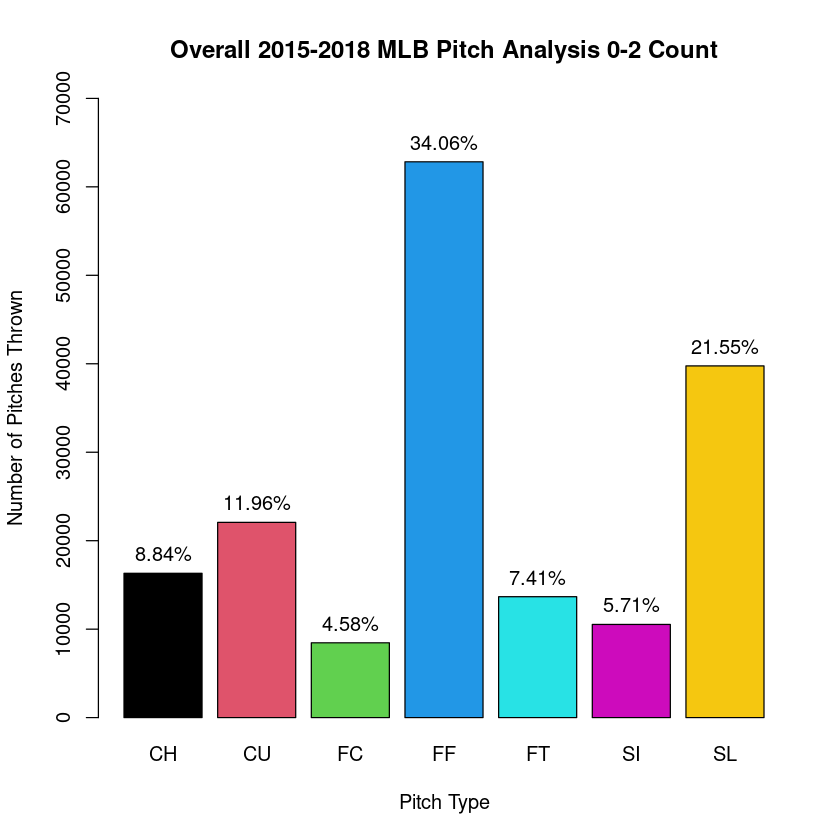

In [18]:
bp <- barplot(count_0_2_freq[common_p],
	   main = "Overall 2015-2018 MLB Pitch Analysis 0-2 Count",
	   xlab = "Pitch Type",
	   ylab = "Number of Pitches Thrown",
	   col = factor(common_p),
	   ylim = c(0, 70000))
text(bp, round(count_0_2_freq[common_p], digits = 2), paste0(as.character(round(count_0_2_perc[common_p], digits = 2)), '%'), pos = 3)

Look at the pitch type count, percentage, and barplot for a 1-1 count.

In [19]:
pitches <- pitches_df$pitch_type
strike = pitches_df$s_count
ball = pitches_df$b_count
count_1_1 <- table(pitches[ball == 1 & strike == 1])
count_1_1_freq <- count_1_1[2:(length(count_1_1))]
count_1_1_perc <- (count_1_1_freq / sum(count_1_1_freq)) * 100
count_1_1_freq
round(count_1_1_perc, digits = 2)


   AB    CH    CU    EP    FA    FC    FF    FO    FS    FT    IN    KC    KN 
    2 40188 25070    68     2 16794 91058   110  5749 32587    35  7477  1213 
   PO    SC    SI    SL    UN 
   57     9 23037 48733     2 


   AB    CH    CU    EP    FA    FC    FF    FO    FS    FT    IN    KC    KN 
 0.00 13.75  8.58  0.02  0.00  5.75 31.16  0.04  1.97 11.15  0.01  2.56  0.42 
   PO    SC    SI    SL    UN 
 0.02  0.00  7.88 16.68  0.00 

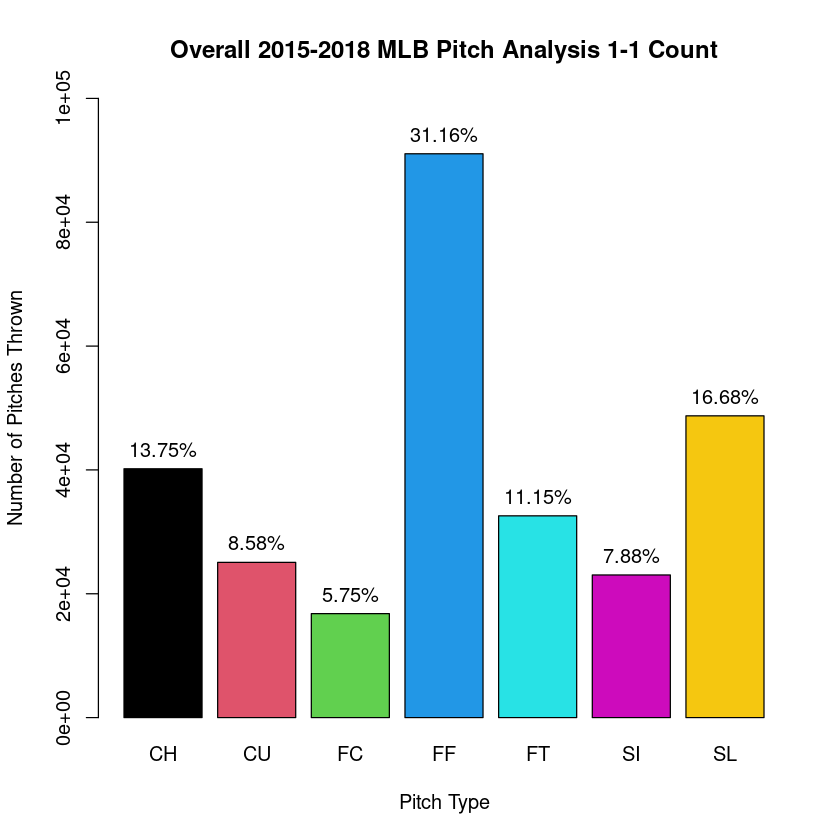

In [20]:
bp <- barplot(count_1_1_freq[common_p],
	   main = "Overall 2015-2018 MLB Pitch Analysis 1-1 Count",
	   xlab = "Pitch Type",
	   ylab = "Number of Pitches Thrown",
	   col = factor(common_p),
	   ylim = c(0, 100000))
text(bp, round(count_1_1_freq[common_p], digits = 2), paste0(as.character(round(count_1_1_perc[common_p], digits = 2)), '%'), pos = 3)

Look at the pitch type count, percentage, and barplot for a 2-1 count.

In [21]:
pitches <- pitches_df$pitch_type
strike = pitches_df$s_count
ball = pitches_df$b_count
count_2_1 <- table(pitches[ball == 2 & strike == 1])
count_2_1_freq <- count_2_1[2:(length(count_2_1))]
count_2_1_perc <- (count_2_1_freq / sum(count_2_1_freq)) * 100
count_2_1_freq
round(count_2_1_perc, digits = 2)


   CH    CU    EP    FC    FF    FO    FS    FT    IN    KC    KN    PO    SI 
19340  6610     9  8867 55470    27  2448 20079    58  2335   552     2 14324 
   SL    UN 
20995     1 


   CH    CU    EP    FC    FF    FO    FS    FT    IN    KC    KN    PO    SI 
12.80  4.37  0.01  5.87 36.71  0.02  1.62 13.29  0.04  1.55  0.37  0.00  9.48 
   SL    UN 
13.89  0.00 

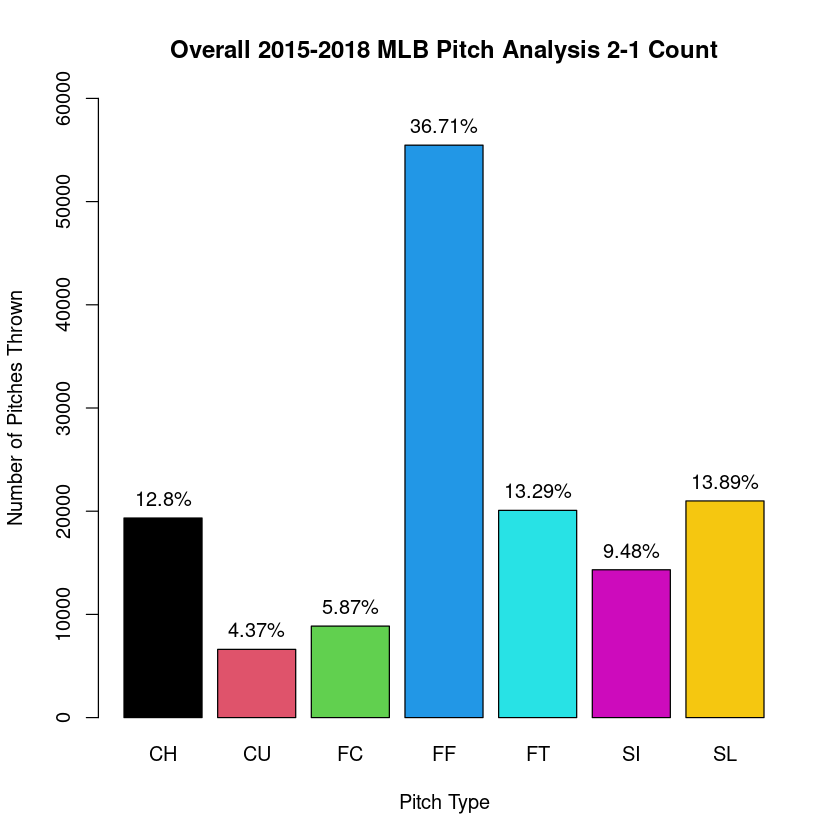

In [22]:
bp <- barplot(count_2_1_freq[common_p],
	   main = "Overall 2015-2018 MLB Pitch Analysis 2-1 Count",
	   xlab = "Pitch Type",
	   ylab = "Number of Pitches Thrown",
	   col = factor(common_p),
	   ylim = c(0, 60000))
text(bp, round(count_2_1_freq[common_p], digits = 2), paste0(as.character(round(count_2_1_perc[common_p], digits = 2)), '%'), pos = 3)

Look at the pitch type count, percentage, and barplot for a 3-1 count.

In [23]:
pitches <- pitches_df$pitch_type
strike = pitches_df$s_count
ball = pitches_df$b_count
count_3_1 <- table(pitches[ball == 3 & strike == 1])
count_3_1_freq <- count_3_1[2:(length(count_3_1))]
count_3_1_perc <- (count_3_1_freq / sum(count_3_1_freq)) * 100
count_3_1_freq
round(count_3_1_perc, digits = 2)


   AB    CH    CU    FC    FF    FO    FS    FT    IN    KC    KN    SC    SI 
    1  3973   944  3165 30424     5   520 10935    84   377   175     1  7523 
   SL 
 4599 


   AB    CH    CU    FC    FF    FO    FS    FT    IN    KC    KN    SC    SI 
 0.00  6.33  1.50  5.05 48.50  0.01  0.83 17.43  0.13  0.60  0.28  0.00 11.99 
   SL 
 7.33 

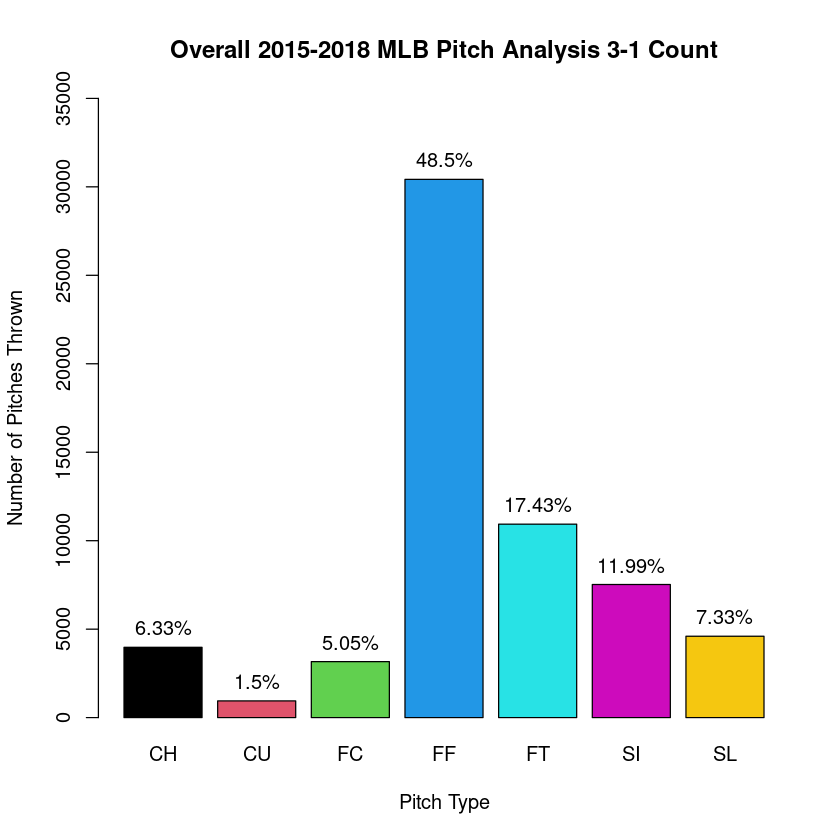

In [24]:
bp <- barplot(count_3_1_freq[common_p],
	   main = "Overall 2015-2018 MLB Pitch Analysis 3-1 Count",
	   xlab = "Pitch Type",
	   ylab = "Number of Pitches Thrown",
	   col = factor(common_p),
	   ylim = c(0, 35000))
text(bp, round(count_3_1_freq[common_p], digits = 2), paste0(as.character(round(count_3_1_perc[common_p], digits = 2)), '%'), pos = 3)

Look at the pitch type count, percentage, and barplot for a 1-2 count.

In [25]:
pitches <- pitches_df$pitch_type
strike = pitches_df$s_count
ball = pitches_df$b_count
count_1_2 <- table(pitches[ball == 1 & strike == 2])
count_1_2_freq <- count_1_2[2:(length(count_1_2))]
count_1_2_perc <- (count_1_2_freq / sum(count_1_2_freq)) * 100
count_1_2_freq
round(count_1_2_perc, digits = 2)


   AB    CH    CU    EP    FA    FC    FF    FO    FS    FT    KC    KN    PO 
    1 29255 32349   172     3 13264 84002   137  6188 21391  8647   986    50 
   SC    SI    SL    UN 
   25 15840 58101     1 


   AB    CH    CU    EP    FA    FC    FF    FO    FS    FT    KC    KN    PO 
 0.00 10.82 11.96  0.06  0.00  4.91 31.06  0.05  2.29  7.91  3.20  0.36  0.02 
   SC    SI    SL    UN 
 0.01  5.86 21.49  0.00 

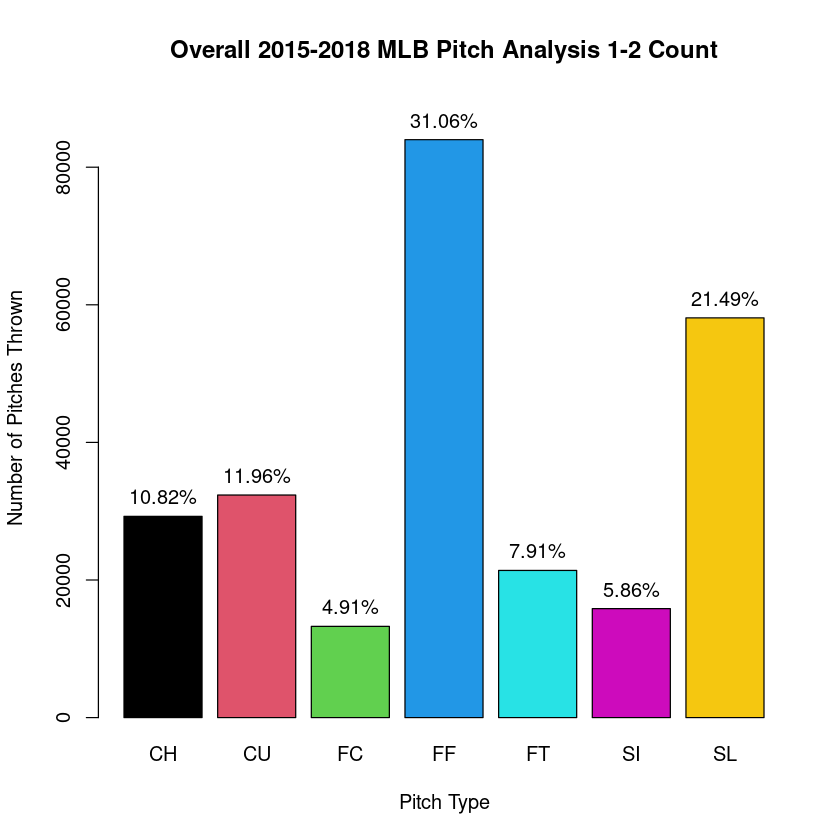

In [26]:
bp <- barplot(count_1_2_freq[common_p],
	   main = "Overall 2015-2018 MLB Pitch Analysis 1-2 Count",
	   xlab = "Pitch Type",
	   ylab = "Number of Pitches Thrown",
	   col = factor(common_p),
	   ylim = c(0, 90000))
text(bp, round(count_1_2_freq[common_p], digits = 2), paste0(as.character(round(count_1_2_perc[common_p], digits = 2)), '%'), pos = 3)

Look at the pitch type count, percentage, and barplot for a 2-2 count.

In [27]:
pitches <- pitches_df$pitch_type
strike = pitches_df$s_count
ball = pitches_df$b_count
count_2_2 <- table(pitches[ball == 2 & strike == 2])
count_2_2_freq <- count_2_2[2:(length(count_2_2))]
count_2_2_perc <- (count_2_2_freq / sum(count_2_2_freq)) * 100
count_2_2_freq
round(count_2_2_perc, digits = 2)


   CH    CU    EP    FC    FF    FO    FS    FT    KC    KN    PO    SC    SI 
27865 21963    86 12216 74432   131  4964 21436  6165   771     2    10 15553 
   SL 
44761 


   CH    CU    EP    FC    FF    FO    FS    FT    KC    KN    PO    SC    SI 
12.10  9.53  0.04  5.30 32.31  0.06  2.15  9.31  2.68  0.33  0.00  0.00  6.75 
   SL 
19.43 

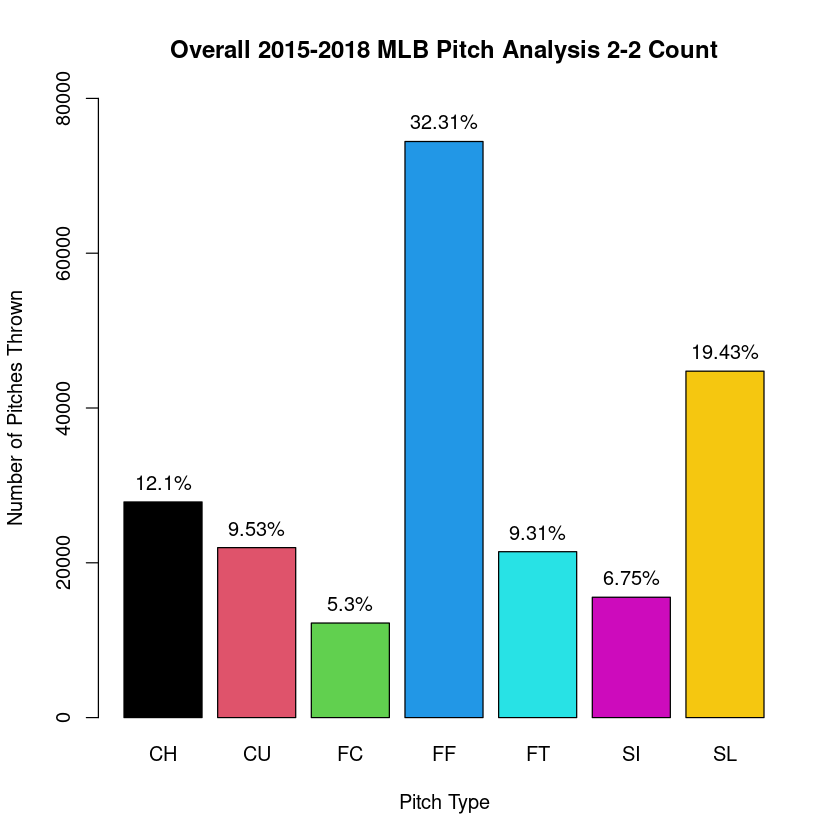

In [28]:
bp <- barplot(count_2_2_freq[common_p],
	   main = "Overall 2015-2018 MLB Pitch Analysis 2-2 Count",
	   xlab = "Pitch Type",
	   ylab = "Number of Pitches Thrown",
	   col = factor(common_p), 
	   ylim = c(0, 80000))
text(bp, round(count_2_2_freq[common_p], digits = 2), paste0(as.character(round(count_2_2_perc[common_p], digits = 2)), '%'), pos = 3)

Look at the pitch type count, percentage, and barplot for a 3-2 count.

In [29]:
pitches <- pitches_df$pitch_type
strike = pitches_df$s_count
ball = pitches_df$b_count
count_3_2 <- table(pitches[ball == 3 & strike == 2])
count_3_2_freq <- count_3_2[2:(length(count_3_2))]
count_3_2_perc <- (count_3_2_freq / sum(count_3_2_freq)) * 100
count_3_2_freq
round(count_3_2_perc, digits = 2)


   CH    CU    EP    FC    FF    FO    FS    FT    IN    KC    KN    SC    SI 
13510  6274     8  7789 56362    46  2148 17075     3  2140   422     4 12103 
   SL 
20670 


   CH    CU    EP    FC    FF    FO    FS    FT    IN    KC    KN    SC    SI 
 9.75  4.53  0.01  5.62 40.68  0.03  1.55 12.32  0.00  1.54  0.30  0.00  8.74 
   SL 
14.92 

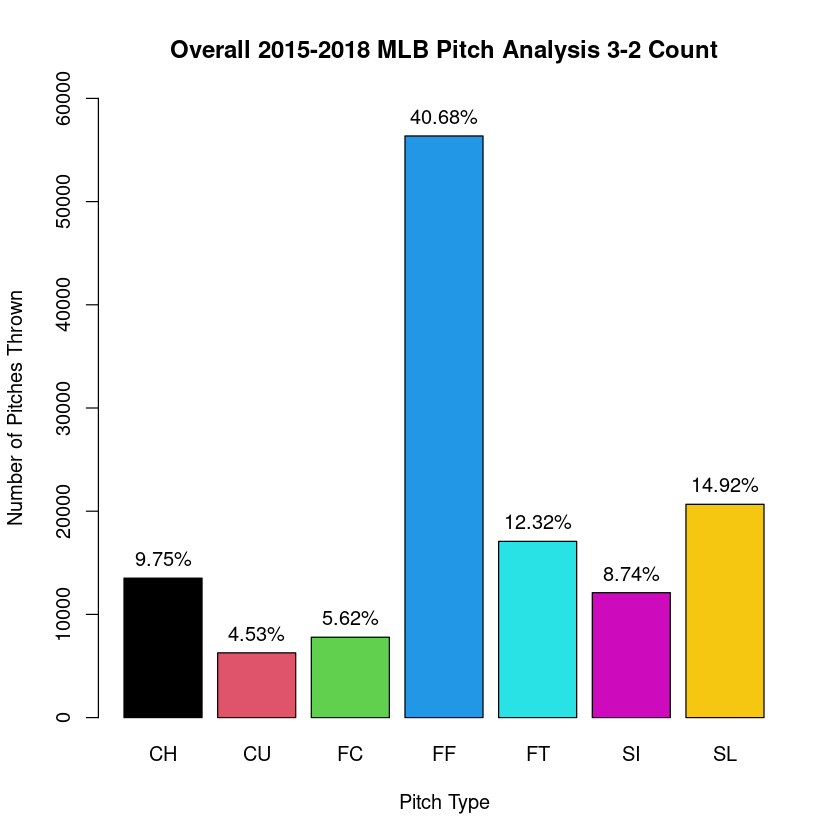

In [30]:
bp <- barplot(count_3_2_freq[common_p],
       main = "Overall 2015-2018 MLB Pitch Analysis 3-2 Count",
       xlab = "Pitch Type",
       ylab = "Number of Pitches Thrown",
       col = factor(common_p),
	   ylim = c(0, 60000))
text(bp, round(count_3_2_freq[common_p], digits = 2), paste0(as.character(round(count_3_2_perc[common_p], digits = 2)), '%'), pos = 3)

Here is an attempt to plot all the plots in the same frame. The figure size for this environment isn't big enough however to effectivly do this.

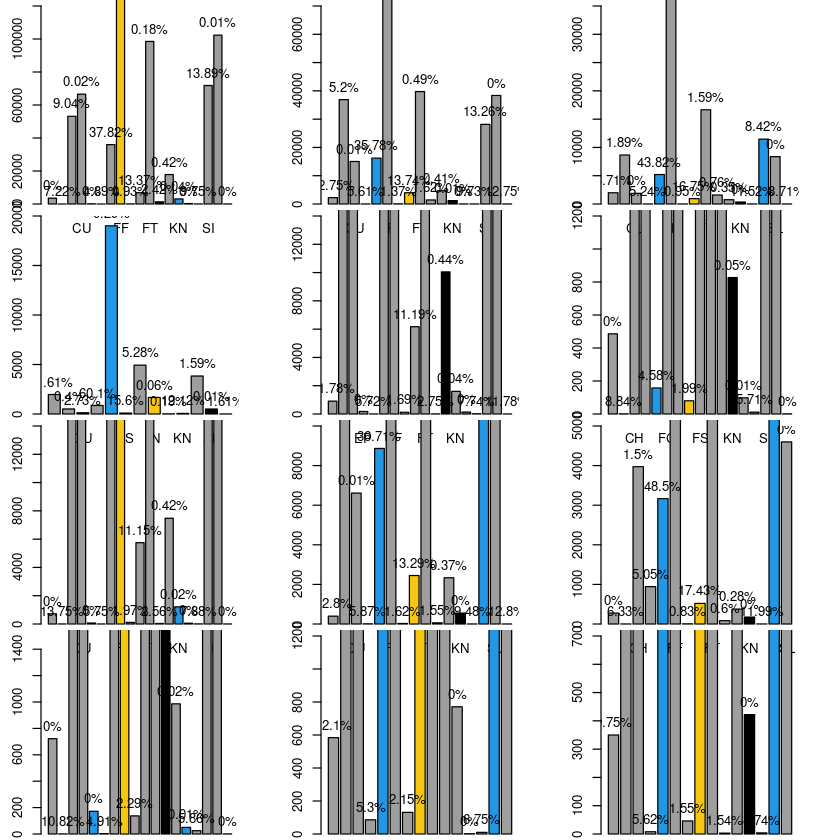

In [31]:
par(mfrow = c(4, 3), pin = c(1.65, 1.65))

bp <- barplot(count_0_0,
	   main = "Overall MLB Pitch Analysis 0-0 Count",
	   xlab = "Pitch Type",
	   ylab = "Number of Pitches Thrown",
	   col = factor(pitches),
	   ylim = c(0, 120000))
text(bp, round(count_0_0, digits = 2), paste0(as.character(round(count_0_0_perc, digits = 2)), '%'), pos = 3)

bp <- barplot(count_1_0,
	   main = "Overall MLB Pitch Analysis 1-0 Count",
	   xlab = "Pitch Type",
	   ylab = "Number of Pitches Thrown",
	   col = factor(pitches),
	   ylim = c(0, 70000))
text(bp, round(count_1_0, digits = 2), paste0(as.character(round(count_1_0_perc, digits = 2)), '%'), pos = 3)

bp <- barplot(count_2_0,
	   main = "Overall MLB Pitch Analysis 2-0 Count",
	   xlab = "Pitch Type",
	   ylab = "Number of Pitches Thrown",
	   col = factor(pitches),
	   ylim = c(0, 35000))
text(bp, round(count_2_0, digits = 2), paste0(as.character(round(count_2_0_perc, digits = 2)), '%'), pos = 3)

bp <- barplot(count_3_0,
	   main = "Overall MLB Pitch Analysis 3-0 Count",
	   xlab = "Pitch Type",
	   ylab = "Number of Pitches Thrown",
	   col = factor(pitches),
	   ylim = c(0, 20000))
text(bp, round(count_3_0, digits = 2), paste0(as.character(round(count_3_0_perc, digits = 2)), '%'), pos = 3)

bp <- barplot(count_0_1,
	   main = "Overall MLB Pitch Analysis 0-1 Count",
	   xlab = "Pitch Type",
	   ylab = "Number of Pitches Thrown",
	   col = factor(pitches),
	   ylim = c(0, 14000))
text(bp, round(count_0_1, digits = 2), paste0(as.character(round(count_0_1_perc, digits = 2)), '%'), pos = 3)

bp <- barplot(count_0_2,
	   main = "Overall MLB Pitch Analysis 0-2 Count",
	   xlab = "Pitch Type",
	   ylab = "Number of Pitches Thrown",
	   col = factor(pitches),
	   ylim = c(0, 1200))
text(bp, round(count_0_2, digits = 2), paste0(as.character(round(count_0_2_perc, digits = 2)), '%'), pos = 3)

bp <- barplot(count_1_1,
	   main = "Overall MLB Pitch Analysis 1-1 Count",
	   xlab = "Pitch Type",
	   ylab = "Number of Pitches Thrown",
	   col = factor(pitches),
	   ylim = c(0, 14000))
text(bp, round(count_1_1, digits = 2), paste0(as.character(round(count_1_1_perc, digits = 2)), '%'), pos = 3)

bp <- barplot(count_2_1,
	   main = "Overall MLB Pitch Analysis 2-1 Count",
	   xlab = "Pitch Type",
	   ylab = "Number of Pitches Thrown",
	   col = factor(pitches),
	   ylim = c(0, 10000))
text(bp, round(count_2_1, digits = 2), paste0(as.character(round(count_2_1_perc, digits = 2)), '%'), pos = 3)

bp <- barplot(count_3_1,
	   main = "Overall MLB Pitch Analysis 3-1 Count",
	   xlab = "Pitch Type",
	   ylab = "Number of Pitches Thrown",
	   col = factor(pitches),
	   ylim = c(0, 5000))
text(bp, round(count_3_1, digits = 2), paste0(as.character(round(count_3_1_perc, digits = 2)), '%'), pos = 3)

bp <- barplot(count_1_2,
	   main = "Overall MLB Pitch Analysis 1-2 Count",
	   xlab = "Pitch Type",
	   ylab = "Number of Pitches Thrown",
	   col = factor(pitches),
	   ylim = c(0, 1500))
text(bp, round(count_1_2, digits = 2), paste0(as.character(round(count_1_2_perc, digits = 2)), '%'), pos = 3)

bp <- barplot(count_2_2,
	   main = "Overall MLB Pitch Analysis 2-2 Count",
	   xlab = "Pitch Type",
	   ylab = "Number of Pitches Thrown",
	   col = factor(pitches), 
	   ylim = c(0, 1200))
text(bp, round(count_2_2, digits = 2), paste0(as.character(round(count_2_2_perc, digits = 2)), '%'), pos = 3)

bp <- barplot(count_3_2,
       main = "Overall MLB Pitch Analysis 3-2 Count",
       xlab = "Pitch Type",
       ylab = "Number of Pitches Thrown",
       col = factor(pitches),
	   ylim = c(0, 700))
text(bp, round(count_3_2, digits = 2), paste0(as.character(round(count_3_2_perc, digits = 2)), '%'), pos = 3)

Here is an analysis to the number of times each count was reached. Then a look into the top and bottom 3 counts. 

In [32]:
print(paste("The number of 0-0 counts =", sum(count_0_0_freq)))
print(paste("The number of 1-0 counts =", sum(count_1_0_freq)))
print(paste("The number of 2-0 counts =", sum(count_2_0_freq)))
print(paste("The number of 3-0 counts =", sum(count_3_0_freq)))
print(paste("The number of 0-1 counts =", sum(count_0_1_freq)))
print(paste("The number of 0-2 counts =", sum(count_0_2_freq)))
print(paste("The number of 1-1 counts =", sum(count_1_1_freq)))
print(paste("The number of 2-1 counts =", sum(count_2_1_freq)))
print(paste("The number of 3-1 counts =", sum(count_3_1_freq)))
print(paste("The number of 1-2 counts =", sum(count_1_2_freq)))
print(paste("The number of 2-2 counts =", sum(count_2_2_freq)))
print(paste("The number of 3-2 counts =", sum(count_3_2_freq)))

# Create a named vector
counts <- c("0-0" = sum(count_0_0_freq), 
			"1-0" = sum(count_1_0_freq), 
			"2-0" = sum(count_2_0_freq),
            "3-0" = sum(count_3_0_freq), 
			"0-1" = sum(count_0_1_freq), 
			"0-2" = sum(count_0_2_freq),
            "1-1" = sum(count_1_1_freq), 
			"2-1" = sum(count_2_1_freq), 
			"3-1" = sum(count_3_1_freq),
            "1-2" = sum(count_1_2_freq), 
			"2-2" = sum(count_2_2_freq), 
			"3-2" = sum(count_3_2_freq))

# Order the counts in descending order
ordered_counts <- counts[order(-counts)]
print(ordered_counts)

# Print the top 3
cat("\nTop 3 counts:\n")
for (i in 1:3) {
  cat(i, ".", names(ordered_counts[i]), ":", ordered_counts[i], "\n")
}

# Print the bottom 3
bottom_indices <- length(ordered_counts):(length(ordered_counts)-2)
cat("\nBottom 3 counts:\n")
for (i in rev(bottom_indices)) {
  cat(length(ordered_counts) - i + 1, ".", names(ordered_counts[i]), ":", ordered_counts[i], "\n")
}

[1] "The number of 0-0 counts = 736713"
[1] "The number of 1-0 counts = 289310"
[1] "The number of 2-0 counts = 99492"
[1] "The number of 3-0 counts = 31631"
[1] "The number of 0-1 counts = 365975"
[1] "The number of 0-2 counts = 184476"
[1] "The number of 1-1 counts = 292191"
[1] "The number of 2-1 counts = 151117"
[1] "The number of 3-1 counts = 62726"
[1] "The number of 1-2 counts = 270412"
[1] "The number of 2-2 counts = 230355"
[1] "The number of 3-2 counts = 138554"
   0-0    0-1    1-1    1-0    1-2    2-2    0-2    2-1    3-2    2-0    3-1 
736713 365975 292191 289310 270412 230355 184476 151117 138554  99492  62726 
   3-0 
 31631 

Top 3 counts:
1 . 0-0 : 736713 
2 . 0-1 : 365975 
3 . 1-1 : 292191 

Bottom 3 counts:
3 . 2-0 : 99492 
2 . 3-1 : 62726 
1 . 3-0 : 31631 


### Analysis of the pitch types thrown with no runners on base.

In [33]:
# Selection of pitch type column
pitches <- pitches_df$pitch_type
# Selection of column containing a 0 or 1 value for whether a runner is on 1st or not.
on_1st = pitches_df$on_1b
# Selection of column containing a 0 or 1 value for whether a runner is on 2nd or not.
on_2nd = pitches_df$on_2b
# Selection of column containing a 0 or 1 value for whether a runner is on 3rd or not.
on_3rd = pitches_df$on_3b
# A table created for no runners on base
pitches_no_runners <- table(pitches[(on_1st == 0) & (on_2nd == 0) & (on_3rd == 0)])
# Cut out the blank count
pitches_no_runners_freq <- pitches_no_runners[2:(length(pitches_no_runners))]
# Percentage calculations
pitches_no_runners_perc <- (pitches_no_runners_freq / sum(pitches_no_runners_freq)) * 100
pitches_no_runners_freq
round(pitches_no_runners_perc, digits = 2)


    AB     CH     CU     EP     FA     FC     FF     FO     FS     FT     IN 
     4 169801 141406    593      7  84485 600524    406  25366 191840     10 
    KC     KN     SC     SI     SL     UN 
 38806   6398     35 138521 249143     12 


   AB    CH    CU    EP    FA    FC    FF    FO    FS    FT    IN    KC    KN 
 0.00 10.31  8.58  0.04  0.00  5.13 36.45  0.02  1.54 11.65  0.00  2.36  0.39 
   SC    SI    SL    UN 
 0.00  8.41 15.12  0.00 

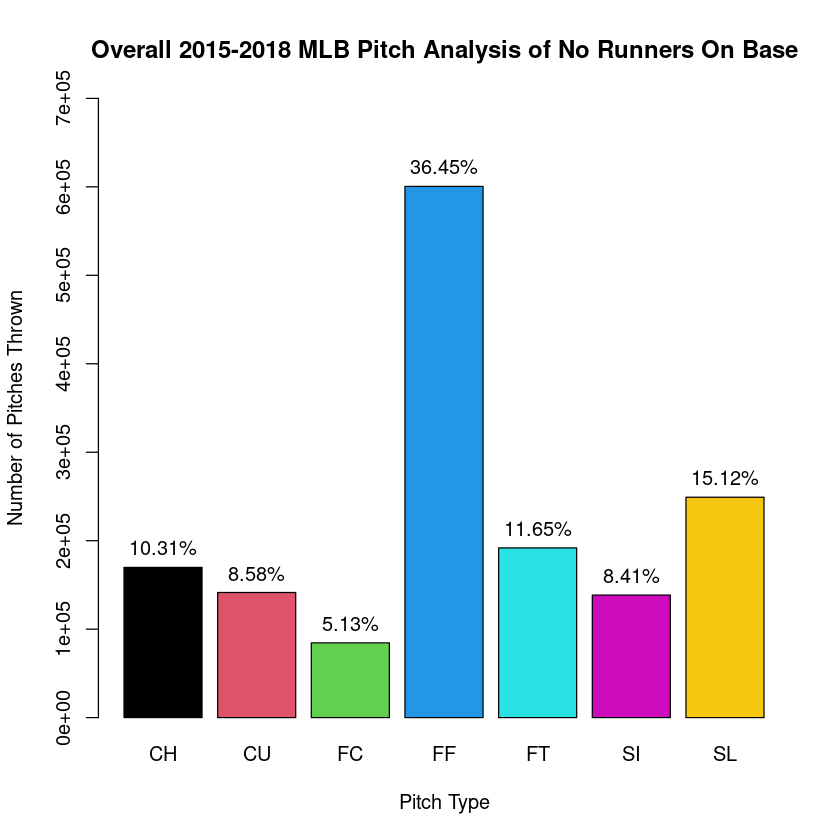

In [34]:
bp <- barplot(pitches_no_runners_freq[common_p],
       main = "Overall 2015-2018 MLB Pitch Analysis of No Runners On Base",
       xlab = "Pitch Type",
       ylab = "Number of Pitches Thrown",
       col = factor(common_p),
	   ylim = c(0, 700000))
text(bp, 
	 round(pitches_no_runners_freq[common_p], 
	 digits = 2), 
	 	paste0(as.character(round(pitches_no_runners_perc[common_p], 
	 	digits = 2)), 
			   '%'), 
	 		   pos = 3)

### Analysis of Pitch Types With Runner on First

In [35]:
pitches_on_1st <- table(pitches[on_1st == 1])
pitches_on_1st_freq <- pitches_on_1st[2:(length(pitches_on_1st))]
pitches_on_1st_perc <- (pitches_on_1st_freq / sum(pitches_on_1st_freq)) * 100
pitches_on_1st_freq
round(pitches_on_1st_perc, digits = 2)


    AB     CH     CU     EP     FA     FC     FF     FO     FS     FT     IN 
     1  87086  62858    139      1  46575 302740    290  12665 110514    292 
    KC     KN     PO     SC     SI     SL     UN 
 18739   3252    610     57  77440 139749     17 


   AB    CH    CU    EP    FA    FC    FF    FO    FS    FT    IN    KC    KN 
 0.00 10.09  7.28  0.02  0.00  5.40 35.08  0.03  1.47 12.81  0.03  2.17  0.38 
   PO    SC    SI    SL    UN 
 0.07  0.01  8.97 16.19  0.00 

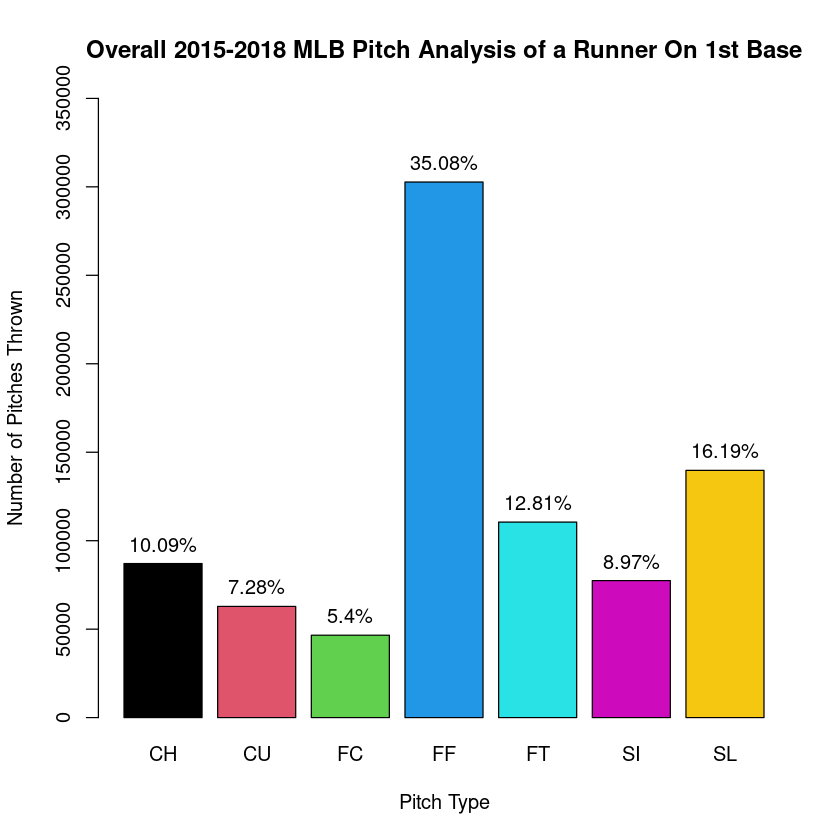

In [36]:
bp <- barplot(pitches_on_1st_freq[common_p],
       main = "Overall 2015-2018 MLB Pitch Analysis of a Runner On 1st Base",
       xlab = "Pitch Type",
       ylab = "Number of Pitches Thrown",
       col = factor(common_p),
	   ylim = c(0, 350000))
text(bp, 
	 round(pitches_on_1st_freq[common_p], 
	 digits = 2), 
	 	paste0(as.character(round(pitches_on_1st_perc[common_p], 
	 	digits = 2)), 
			   '%'), 
	 		   pos = 3)

### Analysis of Pitch Types With Runners in Scoring Position

In [37]:
pitches <- pitches_df$pitch_type
on_2nd = pitches_df$on_2b
on_3rd = pitches_df$on_3b
pitches_runner_in_score_pos <- table(pitches[(on_2nd == 1) | (on_3rd == 1)])
pitches_runner_in_score_pos_freq <- pitches_runner_in_score_pos[2:(length(pitches_runner_in_score_pos))]
pitches_runner_in_score_pos_perc <- (pitches_runner_in_score_pos_freq / sum(pitches_runner_in_score_pos_freq)) * 100
pitches_runner_in_score_pos_freq
round(pitches_runner_in_score_pos_perc, digits = 2)


    AB     CH     CU     EP     FA     FC     FF     FO     FS     FT     IN 
     4  69133  57201    138      2  36570 225818    254  10823  75380   6175 
    KC     KN     PO     SC     SI     SL     UN 
 16956   2830     52     38  56285 121783     33 


   AB    CH    CU    EP    FA    FC    FF    FO    FS    FT    IN    KC    KN 
 0.00 10.17  8.42  0.02  0.00  5.38 33.23  0.04  1.59 11.09  0.91  2.50  0.42 
   PO    SC    SI    SL    UN 
 0.01  0.01  8.28 17.92  0.00 

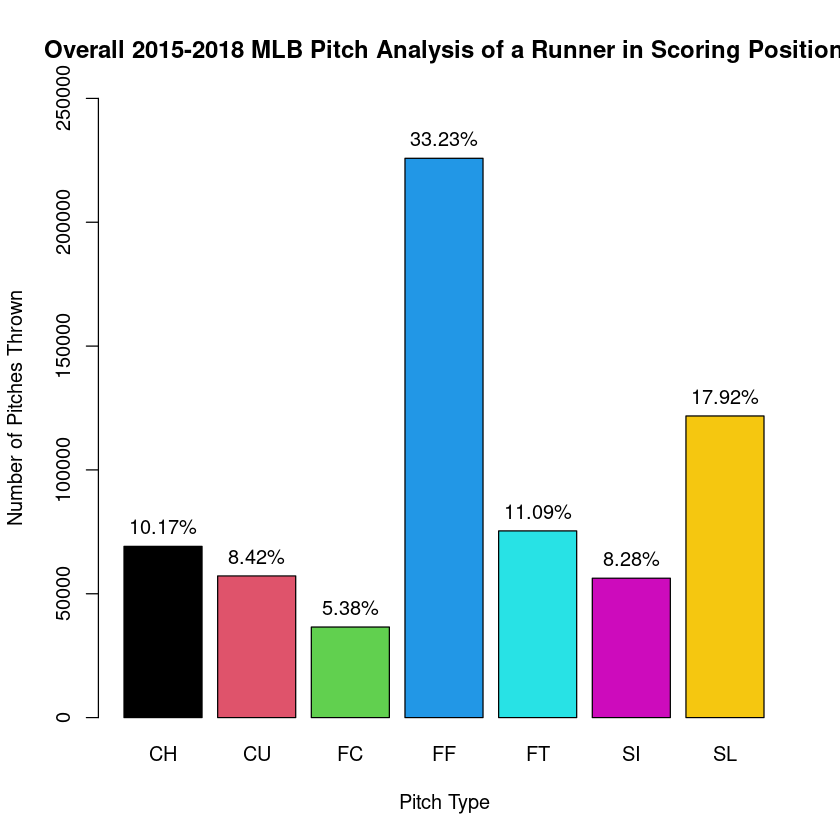

In [38]:
bp <- barplot(pitches_runner_in_score_pos_freq[common_p],
       main = "Overall 2015-2018 MLB Pitch Analysis of a Runner in Scoring Position",
       xlab = "Pitch Type",
       ylab = "Number of Pitches Thrown",
       col = factor(common_p),
	   ylim = c(0, 250000))
text(bp, 
	 round(pitches_runner_in_score_pos_freq[common_p], 
	 digits = 2), 
	 	paste0(as.character(round(pitches_runner_in_score_pos_perc[common_p], 
	 	digits = 2)), 
			   '%'), 
	 		   pos = 3)

## Conclusion
By far the easiest and most expected thing I can conclude is that a four-seam fastball is the most frequent pitch thrown no matter the situations presented in this project. Looking at the overall data the top 4 most common pitches are in order a four-seam fastball, then a slider, then a two-seam fastball, and lastly a change-up. One thing that suprised me was that a cutter had the lowest percentage.

Looking at different counts I can conclude that a 1-2 count has the lowest percentage of fastballs thrown. I can also conclude that a 0-2 count has the highest percentage of a slider. Also that a 0-1 count is the most diverse, we can see this because it is the one plot of a count with all the bars somewhat similar in height.  

From the plot with no runners on base I can conclude that the top four pitches are still the same as the overall analysis(FF, SL, FT, CH) with the four seam fastball having the highest percentage of all runner positions on base. Also for every four seam fastball thrown about 1 slider is thrown. (Slider is about half the percentage of a four seam fastball). From the plot with a runner on first I can say that it has the highest percentage of a two seam fastball to be thrown. From the plot with runners in scoring position I can conclude that the least amount of four-seam fastballs are thrown with the highest percentage of sliders. 

## What I would do in the future?
- I would like to analyze the pitch types thrown for lefty/right match ups between a pitcher and hitter.
- I was unable to do anything with prediction so I would to learn and complete this goal in the future.
- Sort all the barplots in descending order for better viewer comprehension.
- Maybe make an animation between all the count plots.

## References
Bruin Sports Analytics. (2022, Dec 16). Predicting Pitches. https://www.bruinsportsanalytics.com/post/predicting-pitches

Kaggle. MLB Pitch Data 2015-2018. Available at: https://www.kaggle.com/datasets/pschale/mlb-pitch-data-20152018. Accessed September 15, 2023.

Lee, Jae Sik. (2022, July 08). Prediction of pitch type and location in baseball using ensemble model of deep neural networks. Journal of Sports Analytics, vol. 8, no. 2, pp. 115-126. https://content.iospress.com/articles/journal-of-sports-analytics/jsa200559

MLB.com. Pitch Types. https://www.mlb.com/glossary/pitch-types. Accessed September 15, 2023.

OpenAI. (2022). GPT-3.5 Chatbot. OpenAI. https://chat.openai.com/ (Used to find errors in my code, help with formatting graphs, and to provide more knowledge into R)

R Core Team (2022). R: A language and environment for statistical computing. R Foundation for Statistical Computing, Vienna, Austria. URL https://www.R-project.org/.

Towards Data Science. (2021, February 23). Predicting MLB Pitch Probability Based on the Game Situation. https://towardsdatascience.com/predicting-mlb-pitch-probability-based-on-the-game-situation-1afc5a01cf3